In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")


In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [6]:
df_dummies=df_dummies.drop(columns="y_no")
df_dummies=df_dummies.drop(columns="duration")
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
Y=df_dummies["y_yes"]
X=df_dummies.drop(columns="y_yes")
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41188, dtype: uint8

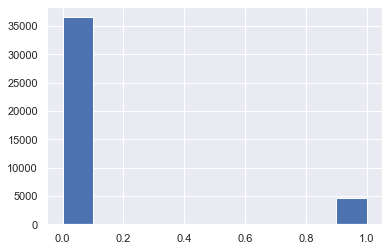

In [9]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


plt.hist(Y)
plt.show()



TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [   14    18    25 ... 41172 41174 41183]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

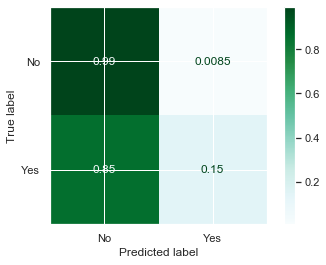

TRAIN: [    2     3     4 ... 41185 41186 41187] TEST: [    0     1     9 ... 41144 41176 41182]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

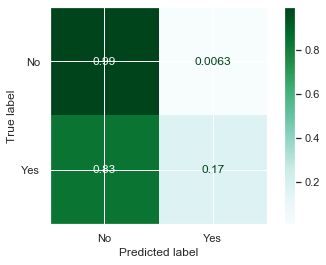

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [    3    31    48 ... 41159 41161 41173]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

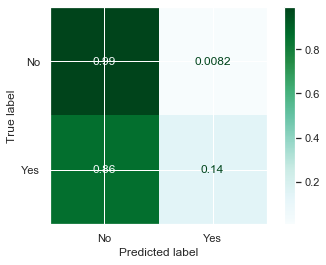

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [    7    15    34 ... 41162 41168 41181]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

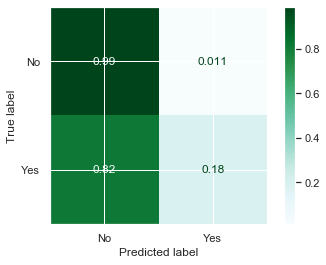

TRAIN: [    0     1     2 ... 41184 41185 41186] TEST: [   17    24    33 ... 41131 41139 41187]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

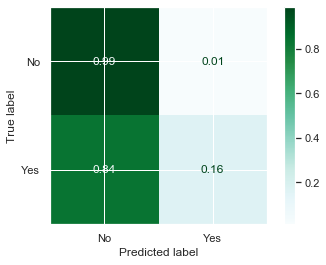

TRAIN: [    0     1     2 ... 41184 41186 41187] TEST: [    5    13    60 ... 41165 41167 41185]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

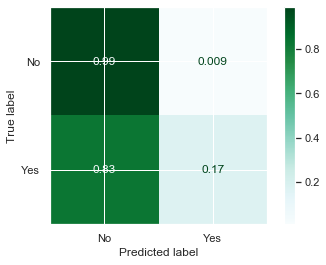

TRAIN: [    0     1     2 ... 41184 41185 41187] TEST: [   10    30    37 ... 41150 41171 41186]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

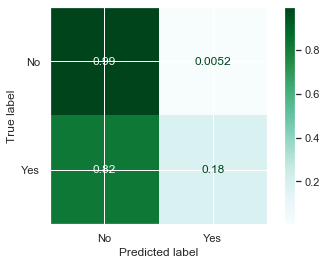

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [    8    16    19 ... 41166 41170 41175]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

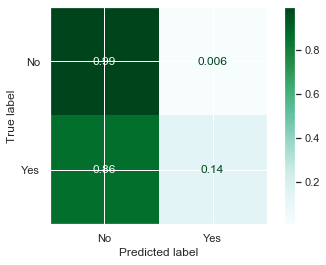

TRAIN: [    0     1     3 ... 41185 41186 41187] TEST: [    2     4    23 ... 41169 41177 41180]
0.11265417111780131
0.11265173995144322
0.11267605633802817


<Figure size 432x288 with 0 Axes>

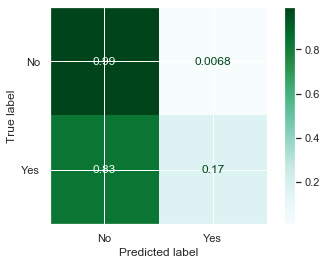

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [    6    12    20 ... 41178 41179 41184]
0.11265417111780131
0.11265173995144322
0.11267605633802817


<Figure size 432x288 with 0 Axes>

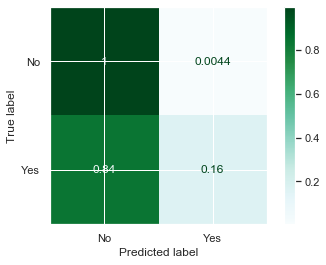

In [31]:
from sklearn.model_selection import StratifiedKFold # import KFold
from sklearn.metrics import plot_confusion_matrix

kf = StratifiedKFold(n_splits=10,shuffle=True) # Define the split - into 2 folds 
X=np.array(X)
Score=[]

for train_index, test_index in kf.split(X,Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    print(len(Y[Y==1])/(len(Y[Y==0])+len(Y[Y==1])))
    print(len(y_train[y_train==1])/(len(y_train[y_train==0])+len(y_train[y_train==1])))
    print(len(y_test[y_test==1])/(len(y_test[y_test==0])+len(y_test[y_test==1])))
    
    clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
    
    clf.fit(X_train,y_train)
    score_=clf.score(X_test,y_test)
    Score.append(score_)
    
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["No","Yes"],
                                 cmap=plt.cm.BuGn,
                                 normalize="true")

    plt.show()
    

In [38]:
print("predicted accuracy of each fold:",Score)

predicted accuracy of each fold: [0.8963340616654528, 0.9004612770089827, 0.8963340616654528, 0.8980335032774945, 0.8965768390386016, 0.8985190580237922, 0.9031318281136198, 0.8975479485311969, 0.9006799417192812, 0.9018941233608548]


<Figure size 432x288 with 0 Axes>

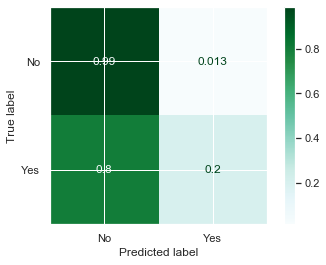

In [33]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
plt.figure()
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=["No","Yes"],
                             cmap=plt.cm.BuGn,
                             normalize="true")

plt.show()
    

[ 2 61  8  7  4 60  6 49 50  5 52 42 43  3 59 53 33 44  0 34 17 48 10 14
 47 51 46 45 55 31 27 23  1 22 16 57 56 58 11 20 54  9 28 32 21 18 30 25
 26 39 15 41 36 38 37 40 13 19 12 24 29 35]
Feature ranking:


(0, 0.47292178616555436)

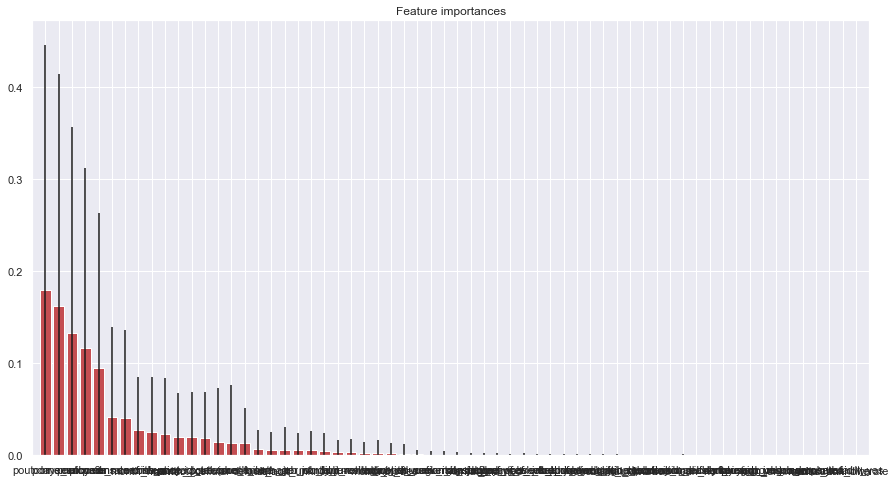

In [37]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(df_dummies.columns)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

